# <span style="color:#0b486b">SIT 720 - Machine Learning</span>

---
Lecturer:   Chandan Karmakar     | karmakar@deakin.edu.au<br />
Tutor:  

School of Information Technology, <br />
Deakin University, VIC 3125, Australia.

---

## Assignment 4


In this assignment, you will use a lot of concepts learnt in this course to come up with a good solution for a given human activity recognition problem.
This assignment has 4 parts.

**Instructions**
1. The dataset consists of training and testing data in "train" and "test" folders. Use training data: X_train.txt labels: y_train.txt and testing data: X_test.txt   labels: y_test.txt. There are other files that also come with the dataset and may be useful in understanding the dataset better.

2. Please read the pdf file "dataset-paper.pdf" to answer Part 1.


### Part 1: Understanding the data 

Answer the following questions briefly, after reading the paper **(3 Marks)**

**What is the objective of the data collection process?**   
  
This dataset was collected to assist ongoing research into sensing human body motion using smartphones. This fits into the broader research field regarding integrating human behaviour with computer systems.


**What human activity types does this dataset have? How many subjects/people have performed these activities?** 

This dataset has six activity types. Namely: standing, sitting, laying down, walking, walking downstairs and walking upstairs. These activities were performed by 30 participants.

**How many instances are available in the training and test sets? How many features are used to represent each instance? Summarize the type of features extracted in 2-3 sentences.** 

The training data comprises of 70% of total instances in this dataset. The test set comprises 30% of total instances in this dataset. There are 561 features used to represent each instance. For each activity, there were 7 time and/or frequency based signals recorded by the smartphone. These signals were then processed further using 17 statistical and mathematical measures to extract the features. For example the average time taken to the accelerate the body or the maximum frequency of body angular speed magnitude.

**Describe briefly what machine learning model is used in this paper for activity recognition and how is it trained. How much is the maximum accuracy achieved?**  
  
Support Vector Machine (SVM) model is used for activity recognition. The model is trained by generalizing SVM binary classification to a multiclass case using One-vs-All approach. 10-fold Cross Validation is used for hyperparamter selection and Gaussian kernels are used where mapping to a higher dimension is required for classification. The maximum accuracy achieved for the test set is 96%.

In [10]:
import pandas as pd

subject_test = pd.read_csv('test/subject_test.txt',header=None).values
X_test = pd.read_csv('test/X_test.txt',header=None,delim_whitespace=True).values
y_test = (pd.read_csv('test/y_test.txt',header=None).values).flatten()

subject_train = pd.read_csv('train/subject_train.txt',header=None).values
X_train = pd.read_csv('train/X_train.txt',header=None,delim_whitespace=True).values
y_train = (pd.read_csv('train/y_train.txt',header=None).values).flatten()

### Part 2: K-Nearest Neighbour Classification

Build a K-Nearest Neighbor classifier for this data. **(5 Marks)** 

* Let K take values from 1 to 50. For choosing the best K, use 10-fold cross-validation. Choose the best value of K based on model F1-score. 
* Show a plot of cross-validation accuracy with respect to K. 
* Using the best K value, evaluate the model performance on the supplied test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

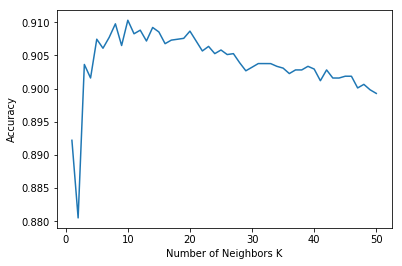

Confusion Matrix:

[[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 485   0]
 [  0   0   0   2   2 533]]

F1 Score: 0.9038079349608216
Accuracy: 0.9066847641669494


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

cv_accuracy_scores=[]
cv_f1_scores=[]
knn_metrics=['accuracy','f1_macro']
eval_metrics = ['test_accuracy','test_f1_macro']
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn,X_train,y_train,cv=10,scoring=knn_metrics,return_train_score=False)
    cv_accuracy_scores.append(scores[eval_metrics[0]].mean())
    cv_f1_scores.append(scores[eval_metrics[1]].mean())

plt.plot(range(1,51), cv_accuracy_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

best_k = range(1,51)[np.argmax(cv_f1_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Confusion Matrix:')
print()
print(confusion_matrix(y_test,y_predict))
print()
print('F1 Score: {}'.format(f1_score(y_test,y_predict,average='macro')))
print('Accuracy: {}'.format(accuracy_score(y_test,y_predict)))

### Part 3: Multiclass Logistic Regression with Elastic Net

Build an elastic-net regularized logistic regression classifier for this data. **(5 Marks)**
* Elastic-net regularizer takes in 2 parameters: alpha and l1-ratio. Use the following values for alpha: 1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2. Use the following values for l1-ratio: 0,0.15,0.5,0.7,1. 

* Choose the best values of alpha and l1-ratio using 10-fold cross-validation, based on model F1-score.

* Draw a surface plot of F1-score with respect to alpha and l1-ratio values.

* Use the best value of alpha and l1-ratio to re-train the model on the training set and use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

The best value of alpha is: 0.001
The best value of l1-ratio is: 0.5


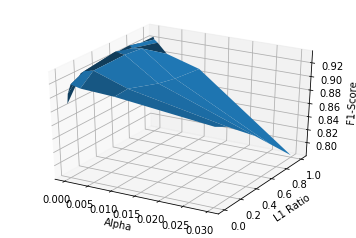

Confusion Matrix:

[[488   5   3   0   0   0]
 [ 19 442   9   1   0   0]
 [  6  21 390   0   3   0]
 [  0   3   0 419  69   0]
 [  1   0   0  12 519   0]
 [  0   0   0   0   0 537]]

F1 Score: 0.9476482490902841
Accuracy: 0.9484221241940957


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

tuned_parameters = {'alpha': [0.0001,0.0003,0.001,0.003,0.01,0.03], 'l1_ratio': [0,0.15,0.5,0.7,1],'loss':['log'],'penalty':['elasticnet']}
clf = GridSearchCV(SGDClassifier(),tuned_parameters,cv=10,scoring='f1_macro')
clf.fit(X_train, y_train)

print('The best value of alpha is: {}'.format(clf.best_params_['alpha']))
print('The best value of l1-ratio is: {}'.format(clf.best_params_['l1_ratio']))

x = []
y = []
z = clf.cv_results_['mean_test_score']
for a in range(0,len(tuned_parameters['alpha'])*len(tuned_parameters['l1_ratio'])):
    x.append(clf.cv_results_['params'][a]['alpha'])
    y.append(clf.cv_results_['params'][a]['l1_ratio'])
    
x=np.asarray(x)
y=np.asarray(y)

x=np.reshape(x,(len(tuned_parameters['alpha']),len(tuned_parameters['l1_ratio'])))
y=np.reshape(y,(len(tuned_parameters['alpha']),len(tuned_parameters['l1_ratio'])))
z=np.reshape(z,(len(tuned_parameters['alpha']),len(tuned_parameters['l1_ratio'])))

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

ax.set_xlabel('Alpha')
ax.set_ylabel('L1 Ratio')
ax.set_zlabel('F1-Score')

plt.show()

logistic = SGDClassifier(loss='log',penalty='elasticnet',alpha=clf.best_params_['alpha'],l1_ratio=clf.best_params_['l1_ratio'])
logistic.fit(X_train,y_train)
y_predict = logistic.predict(X_test)
print('Confusion Matrix:')
print()
print(confusion_matrix(y_test,y_predict))
print()
print('F1 Score: {}'.format(f1_score(y_test,y_predict,average='macro')))
print('Accuracy: {}'.format(accuracy_score(y_test,y_predict)))

### Part 4: Support Vector Machine (RBF Kernel)

Build a SVM (with RBF Kernel) classifier for this data. **(6 Marks)**
* SVM with RBF takes 2 parameters: gamma (length scale of the RBF kernel)  and C (the cost parameter). Use the following values for gamma: 1e-3, 1e-4. Use the following values for C: 1, 10, 100, 1000.

* Choose the best values of gamma and C using 10-fold cross-validation, based on model F1-score.

* Draw a surface plot of F1-score with respect to gamma and C.

* Use the best value of gamma and C to re-train the model on the training set and use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

The best value of C is: 1000
The best value of gamma is: 0.001


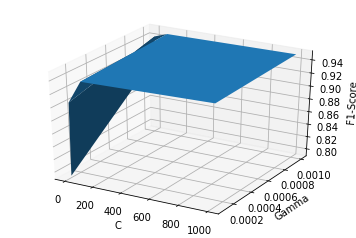

Confusion Matrix:

[[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]

F1 Score: 0.9657675195456977
Accuracy: 0.9657278588394977


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

tuned_parameters = {'kernel':['rbf'],'C':[1,10,100,1000],'gamma':[0.001,0.0001]}
clf = GridSearchCV(svm.SVC(),tuned_parameters,cv=10,scoring='f1_macro')
clf.fit(X_train,y_train)

print('The best value of C is: {}'.format(clf.best_params_['C']))
print('The best value of gamma is: {}'.format(clf.best_params_['gamma']))

x = []
y = []
z = clf.cv_results_['mean_test_score']
for a in range(0,len(tuned_parameters['C'])*len(tuned_parameters['gamma'])):
    x.append(clf.cv_results_['params'][a]['C'])
    y.append(clf.cv_results_['params'][a]['gamma'])
    
x=np.asarray(x)
y=np.asarray(y)

x=np.reshape(x,(len(tuned_parameters['C']),len(tuned_parameters['gamma'])))
y=np.reshape(y,(len(tuned_parameters['C']),len(tuned_parameters['gamma'])))
z=np.reshape(z,(len(tuned_parameters['C']),len(tuned_parameters['gamma'])))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('F1-Score')

plt.show()

svc = svm.SVC(kernel='rbf',C=clf.best_params_['C'],gamma=clf.best_params_['gamma'])
svc.fit(X_train,y_train)
y_predict = svc.predict(X_test)
print('Confusion Matrix:')
print()
print(confusion_matrix(y_test,y_predict))
print()
print('F1 Score: {}'.format(f1_score(y_test,y_predict,average='macro')))
print('Accuracy: {}'.format(accuracy_score(y_test,y_predict)))

### Part 5: Random Forest

Build a Random forest classifier for this data. **(6 Marks)**
* Random forest uses two parameters: the tree-depth for each decision tree and the number of trees. Use the following values for the tree-depth: 300,500,600. Use the following values for the number of trees: 200,500,700.

* Choose the best values of tree-depth and number of trees using 10-fold cross-validation, based on model F1-score.

* Draw a surface plot of F1-score with respect to tree-depth and number of trees.

* Use the best value of tree-depth and number of trees to re-train the model on the training set and use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.


The best value of tree-depth is: 300
The best value of number of trees is: 700


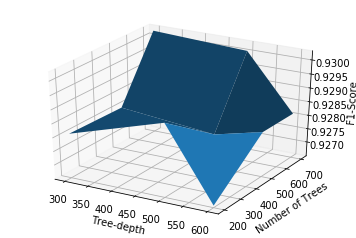

Confusion Matrix:

[[481   7   8   0   0   0]
 [ 34 431   6   0   0   0]
 [ 15  43 362   0   0   0]
 [  0   0   0 436  55   0]
 [  0   0   0  44 488   0]
 [  0   0   0   0   0 537]]

F1 Score: 0.9264303311745347
Accuracy: 0.9280624363759755


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

tuned_parameters = {'n_estimators':[200,500,700],'max_depth':[300,500,600]}
clf = GridSearchCV(RandomForestClassifier(),tuned_parameters,cv=10,scoring='f1_macro')
clf.fit(X_train,y_train)

print('The best value of tree-depth is: {}'.format(clf.best_params_['max_depth']))
print('The best value of number of trees is: {}'.format(clf.best_params_['n_estimators']))

x = []
y = []
z = clf.cv_results_['mean_test_score']
for a in range(0,len(tuned_parameters['max_depth'])*len(tuned_parameters['n_estimators'])):
    x.append(clf.cv_results_['params'][a]['max_depth'])
    y.append(clf.cv_results_['params'][a]['n_estimators'])
    
x=np.asarray(x)
y=np.asarray(y)

x=np.reshape(x,(len(tuned_parameters['max_depth']),len(tuned_parameters['n_estimators'])))
y=np.reshape(y,(len(tuned_parameters['max_depth']),len(tuned_parameters['n_estimators'])))
z=np.reshape(z,(len(tuned_parameters['max_depth']),len(tuned_parameters['n_estimators'])))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

ax.set_xlabel('Tree-depth')
ax.set_ylabel('Number of Trees')
ax.set_zlabel('F1-Score')

plt.show()

rfc = RandomForestClassifier(max_depth=clf.best_params_['max_depth'],n_estimators=clf.best_params_['n_estimators'])
rfc.fit(X_train,y_train)
y_predict = rfc.predict(X_test)
print('Confusion Matrix:')
print()
print(confusion_matrix(y_test,y_predict))
print()
print('F1 Score: {}'.format(f1_score(y_test,y_predict,average='macro')))
print('Accuracy: {}'.format(accuracy_score(y_test,y_predict)))

### Part 6: Discussion
**Which classification method achieved the best performance?**
* Support Vector Machine

**Why?**  
  
  I think that Support Vector Machines work best in this case because the classes of data are not linearly separable. Furthermore, SVM's work best in high dimensional spaces.

**What method performed the worst?**
* KNN

**Could you do better or worse than the results in the dataset paper?**
    
    
  My SVM model performed better than the model in the dataset paper. In the paper, the confusion matrix shows that 107 samples were predicted incorrectly whereas for my model, 101 samples were predicted incorrectly. 

**The model performance can be further improved by:**

* Acquiring more data
* Performing dimensionality reduction to improve computation time
* Fine-tuning the classification algorithms using other hyperparameters, different loss functions etc.
* Using other classification algorithms